# AI Assignment

In [1]:
import pandas as pd  # pandas is a data manipulation library
from sklearn.model_selection import train_test_split  
# train_test_split is used to split the dataset into training and testing sets
from sklearn.naive_bayes import GaussianNB  
# GaussianNB implements the Gaussian Naive Bayes algorithm for classification
from sklearn.metrics import accuracy_score  
# accuracy_score is used to calculate the accuracy of the classifier

data = pd.read_csv("BreastCancer.csv")# Load the data into a pandas DataFrame

In [2]:
data.head() #displays the top rows of a DataFrame

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [15]:
data.shape

(699, 12)

In [3]:
# Check for missing values in the dataset
# isnull() returns a DataFrame of boolean values indicating whether each element is missing
# sum() computes the sum of missing values for each column
data.isnull().sum()

Unnamed: 0          0
Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [4]:
data.shape  # Returns a tuple representing the dimensionality of the DataFrame

(699, 12)

In [5]:
# Remove trivial columns (here the first two columns are trivial)
# drop() method is used to remove specified rows or columns from the DataFrame
cleanedData=data.drop(data.iloc[:,0:2], axis=1) #cleaned data is stored in a new variable
cleanedData.head()  #displays the top rows of a DataFrame

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


In [6]:
bareNuclei_mean=cleanedData["Bare.nuclei"].mean()   # mean() calculates the mean value of Bare.nuclei
print(bareNuclei_mean)

3.5446559297218156


In [7]:
# Calculate the mean of the "Bare.nuclei" column for each class
# groupby() method is used to group DataFrame using a mapper or by a Series 
# of columns and then perform an operation on them
class_means = cleanedData.groupby('Class')['Bare.nuclei'].mean() #mean() calculates the mean value of each group
print("Class-specific means of 'Bare.nuclei':")
print(class_means)

#Higher values of "Bare.nuclei" are more strongly associated with malignant samples, 
#while lower values are more common in benign samples.

Class-specific means of 'Bare.nuclei':
Class
benign       1.346847
malignant    7.627615
Name: Bare.nuclei, dtype: float64


In [8]:
# Fill missing values in each class with the corresponding class-specific mean
# loc[] is used to access a group of rows and columns by labels or a boolean array
for class_name, class_mean in class_means.items():
    cleanedData.loc[(cleanedData['Class'] == class_name) & (cleanedData['Bare.nuclei'].isnull()), 
                    'Bare.nuclei'] = class_mean

In [9]:
# Split the data into features and target variable
# drop() method is used to remove the specified column from the DataFrame
X = cleanedData.drop('Class', axis=1)  # Features: The input variables used to predict the target variable
y = cleanedData['Class']  # Target variable: The variable we want to predict

In [10]:
# Split the data using stratified sampling
# test_size specifies the proportion of the dataset to include in the test split 
# (0.2 mean 20% of the data will be used for testing)
# random_state sets the seed for random number generation for reproducibility and ensures that the data splitting 
# process produces consistent results
# stratify=y ensures that the class distribution is preserved in the splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19, stratify=y)

In [11]:
# Train the Gaussian Naive Bayes classifier
classifier = GaussianNB()   # Create an instance of the Gaussian Naive Bayes classifier
classifier.fit(X_train, y_train)    # Train the classifier using the training data

GaussianNB()

In [12]:
y_pred = classifier.predict(X_test)   # Predict the class labels for the testing data
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred) 
# accuracy_score compares the predicted labels to the actual labels and returns the accuracy
print("Accuracy of the Bayesian classifier:", accuracy)

Accuracy of the Bayesian classifier: 0.9857142857142858


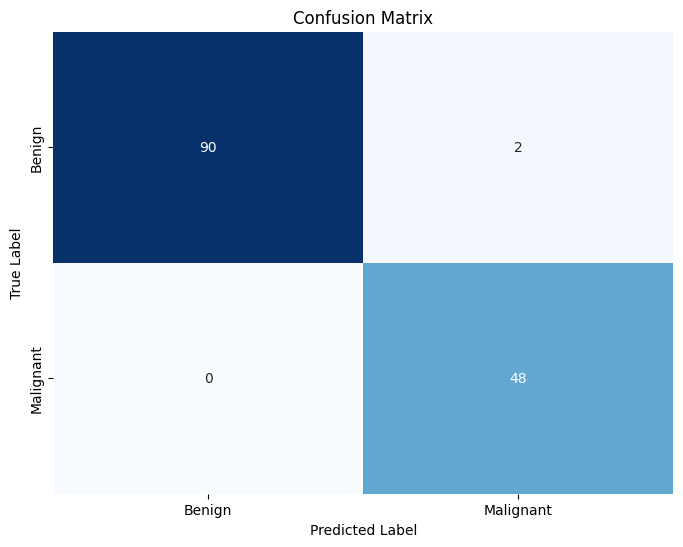

In [13]:
from sklearn.metrics import confusion_matrix  # The confusion_matrix function computes the confusion matrix to evaluate the accuracy of a 
#classification model. 
import seaborn as sns  # Import seaborn for visualization
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Create a confusion matrix
# confusion_matrix function computes confusion matrix to evaluate the accuracy of a classification
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))  # Figure size for the plot

# Plotting the confusion matrix as a heatmap
sns.heatmap(
    conf_matrix,        # The confusion matrix data
    annot=True,         # Annotate each cell with the numeric value of the confusion matrix
    cmap='Blues',       # Color map for the heatmap, 'Blues' provides a gradient of blue colors
    cbar=False,         # To display a color bar or not
    xticklabels=['Benign', 'Malignant'],  # Labels for the x-axis ticks (predicted labels)
    yticklabels=['Benign', 'Malignant']   # Labels for the y-axis ticks (true labels)
)
plt.title('Confusion Matrix')   # Title
plt.xlabel('Predicted Label')   # Label for the x-axis
plt.ylabel('True Label')        # Label for the y-axis
plt.show()                      # Display the plot